# Visualization of Trends and Patterns from Clean Dataset

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("cleaned_dataset.csv")
data.head(-10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,No Province/State,Afghanistan,33.9391,67.7100,2020-01-22,0,0,0,0,Eastern Mediterranean
1,No Province/State,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,No Province/State,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,No Province/State,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,No Province/State,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49053,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-07-27,8,1,7,0,Europe
49054,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,2020-07-27,99,2,36,61,Europe
49055,No Province/State,Botswana,-22.3285,24.6849,2020-07-27,739,2,63,674,Africa
49056,No Province/State,Burundi,-3.3731,29.9189,2020-07-27,378,1,301,76,Africa


## Total COVID Cases Per Region

In [117]:
pd.set_option('future.no_silent_downcasting', True)

# Group by WHO Region and Province/State and sum the columns
grouped = data.groupby(['WHO Region', 'Province/State']).agg(
    {
        'Deaths': 'sum',
        'Recovered': 'sum',
        'Confirmed': 'sum'
    }
).reset_index()

# Calculating grand totals
grand_totals = grouped[['Deaths', 'Recovered', 'Confirmed']].sum()

# Creating a DataFrame for grand totals
grand_totals_df = pd.DataFrame({
    'WHO Region': ['Grand Total'],
    'Province/State': [''],
    'Deaths': [grand_totals['Deaths']],
    'Recovered': [grand_totals['Recovered']],
    'Confirmed': [grand_totals['Confirmed']]
})

# Converting columns to numeric
grand_totals_df[['Deaths', 'Recovered', 'Confirmed']] = grand_totals_df[['Deaths', 'Recovered', 'Confirmed']].apply(pd.to_numeric, errors='coerce')

# Append grand totals to the grouped DataFrame
final_table = pd.concat([grouped, grand_totals_df], ignore_index=True)

final_table[['Deaths', 'Recovered', 'Confirmed']] = final_table[
    ['Deaths', 'Recovered', 'Confirmed']
].map(lambda x: f"{x:,.2f}")

final_table.head(10)

,WHO Region,Province/State,Deaths,Recovered,Confirmed
0,Africa,No Province/State,"439,978.00","11,193,730.00","21,791,827.00"
1,Americas,Alberta,"14,245.00",0.00,"751,219.00"
2,Americas,British Columbia,"16,752.00",0.00,"298,207.00"
3,Americas,Manitoba,746.00,0.00,"35,148.00"
4,Americas,New Brunswick,99.00,0.00,"16,711.00"
5,Americas,Newfoundland and Labrador,339.00,0.00,"31,030.00"
6,Americas,No Province/State,"18,659,726.00","157,069,444.00","392,904,643.00"
7,Americas,Northwest Territories,0.00,0.00,585.00
8,Americas,Nova Scotia,"5,394.00",0.00,"110,330.00"
9,Americas,Ontario,"226,791.00",0.00,"3,100,515.00"


<Figure size 1200x600 with 0 Axes>

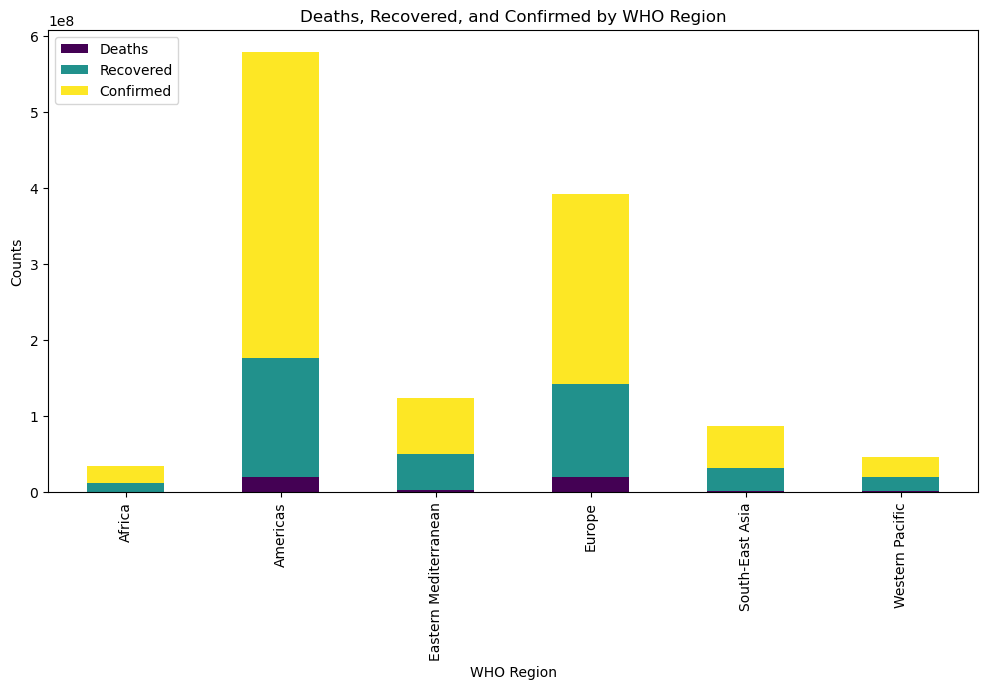

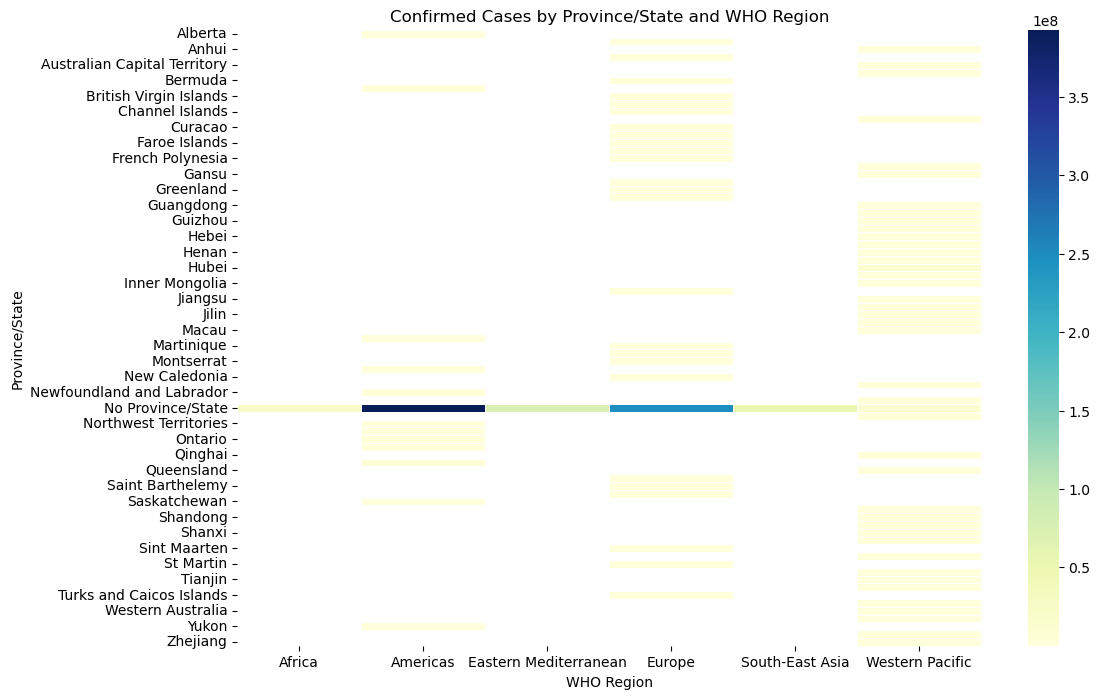

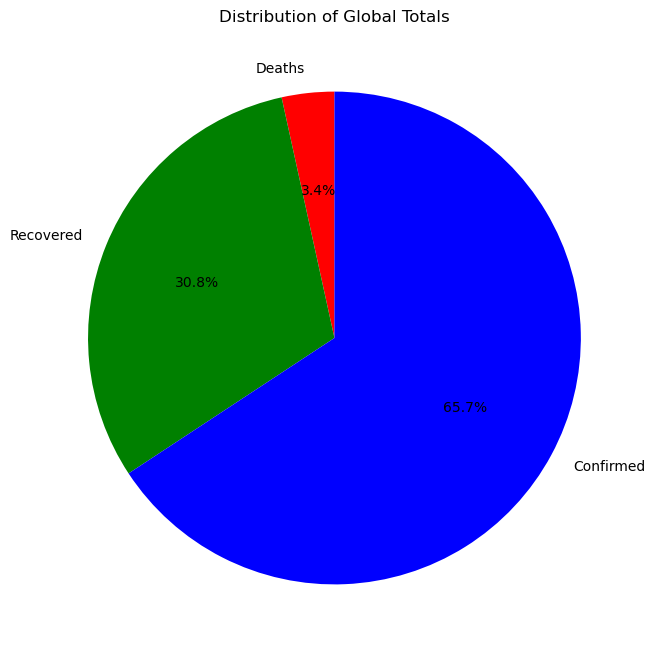

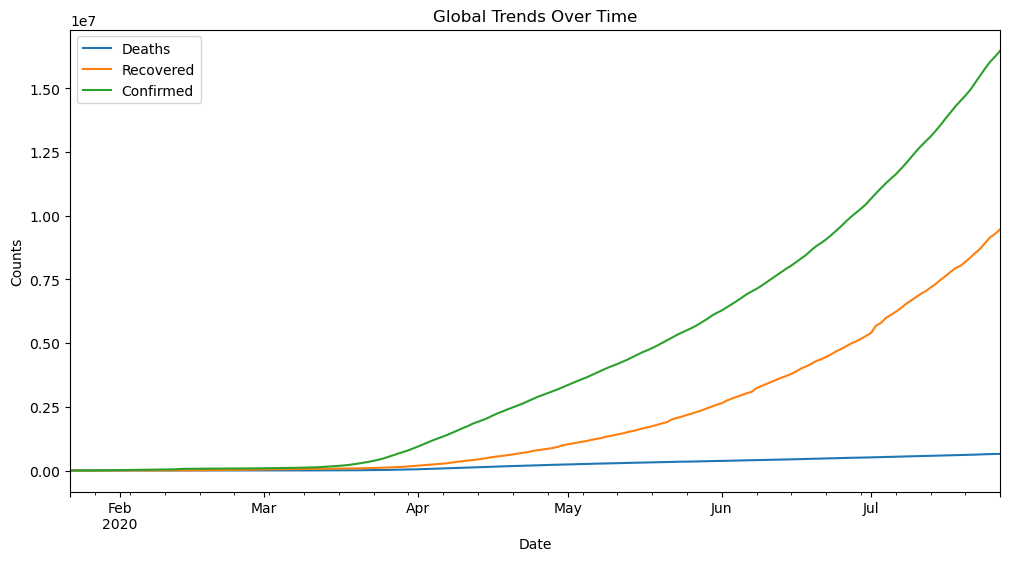

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stacked Bar Chart
plt.figure(figsize=(12, 6))
grouped_by_region = grouped.groupby('WHO Region').sum()
grouped_by_region[['Deaths', 'Recovered', 'Confirmed']].plot(
    kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Deaths, Recovered, and Confirmed by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Counts')
plt.legend(loc='upper left')
plt.show()

# Heatmap
pivot_table = grouped.pivot(
    index='Province/State', columns='WHO Region', values='Confirmed')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=False, cmap='YlGnBu', fmt='.0f', linewidths=.5)
plt.title('Confirmed Cases by Province/State and WHO Region')
plt.show()

# Pie Chart for Grand Totals
plt.figure(figsize=(8, 8))
grand_totals_df.set_index('WHO Region').iloc[0][['Deaths', 'Recovered', 'Confirmed']].plot(
    kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.title('Distribution of Global Totals')
plt.ylabel('')
plt.show()

# Line Chart for Trends Over Time
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    trends = data.groupby('Date').sum()
    trends[['Deaths', 'Recovered', 'Confirmed']].plot(figsize=(12, 6))
    plt.title('Global Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Counts')
    plt.legend(loc='upper left')
    plt.show()

# Creating a Report

In [120]:
from matplotlib.backends.backend_pdf import PdfPages

# Create a PDF file to save the visualizations
pdf_file_name = "visualizations_report.pdf"
with PdfPages(pdf_file_name) as pdf:
    # Stacked Bar Chart
    plt.figure(figsize=(12, 6))
    grouped_by_region = grouped.groupby('WHO Region').sum()
    grouped_by_region[['Deaths', 'Recovered', 'Confirmed']].plot(
        kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
    plt.title('Deaths, Recovered, and Confirmed by WHO Region')
    plt.xlabel('WHO Region')
    plt.ylabel('Counts')
    plt.legend(loc='upper left')
    plt.tight_layout()  
    pdf.savefig()
    plt.close()

    # Heatmap
    pivot_table = grouped.pivot(
        index='Province/State', columns='WHO Region', values='Confirmed')
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=False, cmap='YlGnBu', fmt='.0f', linewidths=.5)
    plt.title('Confirmed Cases by Province/State and WHO Region')
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # Pie Chart for Grand Totals
    plt.figure(figsize=(8, 8))
    grand_totals_df.set_index('WHO Region').iloc[0][['Deaths', 'Recovered', 'Confirmed']].plot(
        kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
    plt.title('Distribution of Global Totals')
    plt.ylabel('')
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # Line Chart for Trends Over Time
    if 'Date' in data.columns:
        data['Date'] = pd.to_datetime(data['Date'])
        trends = data.groupby('Date').sum()
        trends[['Deaths', 'Recovered', 'Confirmed']].plot(figsize=(12, 6))
        plt.title('Global Trends Over Time')
        plt.xlabel('Date')
        plt.ylabel('Counts')
        plt.legend(loc='upper left')
        plt.tight_layout()  # Ensure everything fits into the figure
        pdf.savefig()  # Save the figure to the PDF
        plt.close()

print(f"Visualizations saved to {pdf_file_name}")

Visualizations saved to visualizations_report.pdf


<Figure size 1200x600 with 0 Axes>